In [ ]:
# a/b test about an e-commerce website.
# goal is to find out whether to implement the new site.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
df.shape

(294478, 5)

In [6]:
df.nunique() # notice the number of unique users

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
df['converted'].mean() # overall conversion rate

0.11965919355605512

In [9]:
# new_page and treatment don't line up
df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
889,839954,2017-01-06 20:58:22.280929,treatment,old_page,0
1037,880442,2017-01-07 21:42:39.026815,treatment,old_page,0
1106,817911,2017-01-17 21:51:43.220160,treatment,old_page,0
1376,844475,2017-01-20 14:25:37.359614,treatment,old_page,0


In [10]:
# control group and old_page don't line up
df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
988,698120,2017-01-22 07:09:37.540970,control,new_page,0
1198,646342,2017-01-06 18:39:23.484797,control,new_page,0
1354,735021,2017-01-16 09:51:29.349493,control,new_page,0
1474,678638,2017-01-18 06:36:42.515395,control,new_page,0
1877,717682,2017-01-07 03:05:39.891873,control,new_page,0


In [11]:
# check null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')
df2 = df2t.merge(df2c, how='outer')

In [14]:
df2.shape

(290585, 5)

In [15]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [20]:
# double check incorrect rows are removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [21]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [26]:
# one user_id dup
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [29]:
df2[df2.duplicated('user_id', keep='last')]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [30]:
df2 = df2[~df2.duplicated('user_id', keep='first')]
df2.shape

(290584, 5)

In [31]:
# ovral conversion rate
df2['converted'].mean()

0.11959708724499628

In [32]:
# control group, conversion rate
df2_control = df2.query('group == "control"')
df2_control['converted'].mean()

0.1203863045004612

In [33]:
# treatment group, conversion rate
df2_treat = df2.query('group == "treatment"')
df2_treat['converted'].mean()

0.11880806551510564

In [34]:
# prob of new page
len(df2_treat) / len(df2)

0.5000619442226688

In [35]:
# The conversion rate of control group is 12.03% and that of treatment group is 11.88%.
# It seems that new page does not lead to higher conversion rate.
# It remains to be tested.

In [36]:
# null hyp: p_new <= p_old
# alt: p_new > o_old

In [38]:
p_overall = df2['converted'].mean()
p_overall

0.11959708724499628

In [40]:
n_new = len(df2_treat)
n_new

145310

In [41]:
n_old = len(df2_control)
n_old

145274

(array([128017.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17293.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

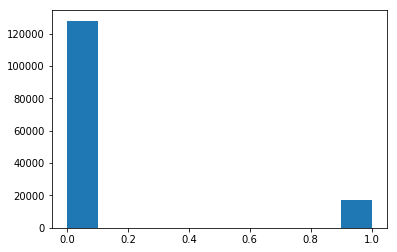

In [45]:
# simulate under null for n_new
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_overall, 1 - p_overall])
plt.hist(new_page_converted)

(array([127760.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

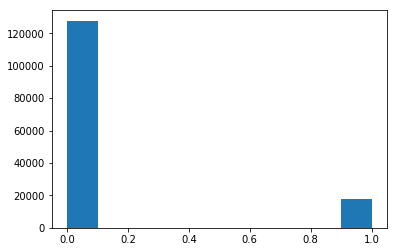

In [44]:
# simulate under null for n_old
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_overall, 1 - p_overall])
plt.hist(old_page_converted)

In [47]:
new_page_converted.mean() - old_page_converted.mean()

-0.0015507542643437844

In [48]:
# simulate 10000 times
new_page_converted = np.random.binomial(n_new, p_overall, 10000) / n_new
old_page_converted = np.random.binomial(n_old, p_overall, 10000) / n_old
p_diffs = new_page_converted - old_page_converted

In [49]:
p_diffs.mean()

4.154094943702517e-06

In [50]:
ab_data_diff = df2_treat['converted'].mean() - df2_control['converted'].mean()
ab_data_diff

-0.0015782389853555567

In [51]:
(p_diffs > ab_data_diff).mean()

0.9065

In [52]:
(p_diffs < ab_data_diff).mean()

0.0935

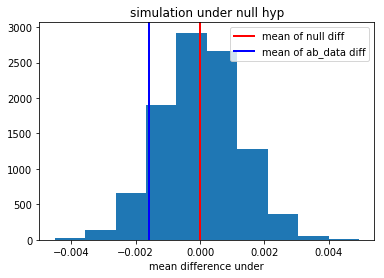

In [54]:
low = ab_data_diff
high = p_diffs.mean()

plt.hist(p_diffs)
plt.title('simulation under null hyp')
plt.xlabel('mean difference under')
plt.axvline(x=high, color='r', linewidth=2, label='mean of null diff')
plt.axvline(x=low, color='b', linewidth=2, label='mean of ab_data diff')
plt.legend()

In [55]:
# p-value
(p_diffs > ab_data_diff).mean()

0.9065

In [57]:
import statsmodels.api as sm

convert_old = df2_control['converted'].sum()
convert_new = df2_treat['converted'].sum()

In [58]:
z_score, pvalue = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, pvalue

(1.3109241984234394, 0.9050583127590245)

In [59]:
# we cannot reject null hypothesis

In [60]:
df2['intercept'] = 1
df2['ab_page'] = 0
df2.loc[df2['group'] == 'treatment', 'ab_page'] = 1
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [61]:
df2['ab_page'].value_counts()

1    145310
0    145274
Name: ab_page, dtype: int64

In [62]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
res = lm.fit()
res

In [63]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.190
Time:                        21:07:40   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [65]:
country_dummies = pd.get_dummies(df_countries['country'])
country_dummies

,CA,UK,US
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [66]:
df_new = df_countries.join(country_dummies)
df_new.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [67]:
df3 = df2.set_index('user_id').join(df_new.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [68]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'UK', 'US']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.201
Time:                        21:18:54   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
US             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.178
Time:                        21:20:42   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
US             0.0042      0.003      1.514      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""